# Image & Bounding Boxes Augmentation

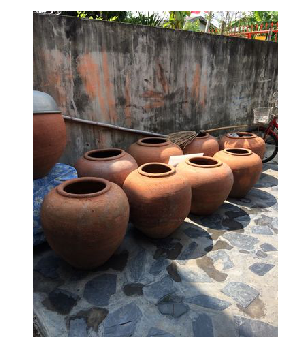

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread('jar.jpg')
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(img)
_ = plt.axis('off')

In [6]:
GREEN = [0, 255, 0]
ORANGE = [255, 140, 0]
RED = [255, 0, 0]

def draw_bbs(image, bbs):
    for bb in bbs.bounding_boxes:
        if bb.is_fully_within_image(image.shape):
            color = GREEN
        elif bb.is_partly_within_image(image.shape):
            color = ORANGE
        else:
            color = RED
        image = bbs.draw_on_image(image, thickness=3, color=color)
    return image

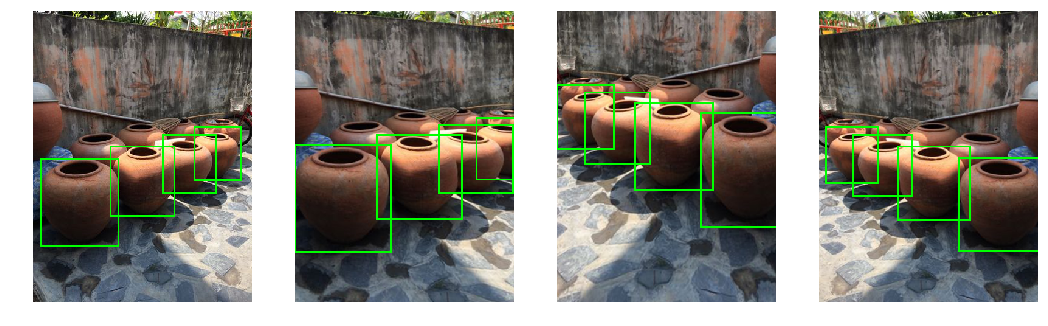

In [10]:
ia.seed(1)
N = 3
image = plt.imread('jar.jpg')
images = np.array(
    [image for _ in range(N)],
    dtype=np.uint8
)

bbs = np.array(
    [ia.BoundingBoxesOnImage([
        ia.BoundingBox(x1=13, y1=245, x2=139, y2=386),
        ia.BoundingBox(x1=128, y1=225, x2=231, y2=337),
        ia.BoundingBox(x1=214, y1=206, x2=299, y2=299),
        ia.BoundingBox(x1=266, y1=193, x2=340, y2=278),
    ], shape=image.shape) for _ in range(N)]
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
#     iaa.Affine(
#         rotate=(-25, 25),
#     ),
    iaa.PerspectiveTransform(scale=(0.01, 0.1)),
    iaa.Fliplr(0.5)
], random_order=False) 


seq_det = seq.to_deterministic()

image_aug = seq_det.augment_images(images)
bbs_aug = seq_det.augment_bounding_boxes(bbs)

image = ia.quokka(size=(256, 256))

# image with BBs before/after augmentation (shown below)
image_before = bbs[0].draw_on_image(images[0], thickness=3)

fig = plt.figure(figsize=(18,18))
_ = plt.subplot(1,4,1)
_ = plt.imshow(image_before)
_ = plt.axis('off') 
for i in range(N):
#     image_after = bbs_aug[i].remove_out_of_image().cut_out_of_image().draw_on_image(image_aug[i], thickness=2, color=[0, 0, 255])
    image_after = draw_bbs(image_aug[i],  bbs_aug[i].remove_out_of_image().cut_out_of_image())
    _ = plt.subplot(1,4,2+i)
    _ = plt.imshow(image_after)
    _ = plt.axis('off')
plt.show()